## お弁当の売り上げ数を予測
### 廃棄損失を減らせる

### お弁当の売り上げデータを使い、実際にモデルを作る。signateに投稿するまで

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression as LR


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv', header=None)

In [6]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [11]:
test.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [8]:
#train から説明変数と目的変数を取り出す
#今回はtemperatureにする

trainX = train['temperature']
y = train['y']

In [10]:
#test からもデータを取り出す

testX = test['temperature']

In [12]:
#まず単回帰をめざすためデータを整える

trainX = trainX.values.reshape(-1,1)
testX = testX.values.reshape(-1,1)

In [13]:
model1 = LR()

In [14]:
model1.fit(trainX, y)

LinearRegression()

In [15]:
model1.coef_

#どちらかが上がるとどちらかが下がることが分かる

array([-2.5023821])

In [16]:
model1.intercept_

134.79948383749922

In [23]:
#予測する

pred = model1.predict(testX)
pred

array([ 84.25136537,  74.99255159,  62.9811175 ,  80.99826864,
        79.49683938,  76.49398085,  78.49588653,  69.48731097,
        67.73564349,  95.76232304,  88.25517673,  77.24469548,
        74.99255159,  84.25136537,  96.01256125,  98.01446693,
        88.00493852,  77.99541011,  87.00398568,  85.75279463,
        85.75279463,  87.75470031,  87.5044621 ,  94.7613702 ,
        86.75374747,  84.50160358,  81.74898327,  98.01446693,
        98.76518156,  86.00303284,  95.26184662,  99.01541977,
        94.51113199,  97.51399051, 108.52447176,  97.51399051,
       106.27232787, 111.7775685 ,  97.01351409,  96.51303767])

In [19]:
#sampleに予想結果を代入する

sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [22]:
sample[1] = pred
sample.head()

,0,1
0,2014-10-1,84.251365
1,2014-10-2,74.992552
2,2014-10-3,62.981117
3,2014-10-6,80.998269
4,2014-10-7,79.496839


In [24]:
sample.to_csv('./output_csv/submit1.csv', index=None, header=None)

## スコアが41.98と低かったため別のやり方を選択する

In [30]:
#説明変数にkcalを選択する
#欠損値が無いか確認する


train['kcal'].isnull().sum()

41

In [28]:
#今回はカロリーの平均値で欠損値を補完する

avg = train['kcal'].mean()
avg

404.4096385542169

In [31]:
trainX = train['kcal'].fillna(avg)
y = train['y']

testX = test['kcal'].fillna(avg)

In [32]:
trainX.head()

0    404.409639
1    404.409639
2    404.409639
3    404.409639
4    404.409639
Name: kcal, dtype: float64

In [33]:
#単回帰をめざすためデータを整える

trainX = trainX.values.reshape(-1,1)
testX = testX.values.reshape(-1,1)

In [34]:
model2 = LR()

In [35]:
model2.fit(trainX, y)

LinearRegression()

In [37]:
model2.coef_

#傾きが小さくあまり関係なさそう

array([0.13195178])

In [39]:
model2.intercept_

33.26061577029441

In [40]:
#モデルを作成

pred2 = model2.predict(testX)

In [44]:
sample[1] = pred2
sample.head()

,0,1
0,2014-10-1,88.680364
1,2014-10-2,88.020605
2,2014-10-3,86.701088
3,2014-10-6,86.041329
4,2014-10-7,89.999882


In [45]:
sample.to_csv('./output_csv/submit2.csv', index=None, header=None)

## スコアが39.59と多少評価が上がった

In [46]:
#重回帰分析をしてみる
#weekに注目し各種がそれぞれいくつあるか確認

train['week'].value_counts()

水    43
木    43
金    41
火    41
月    39
Name: week, dtype: int64

In [47]:
#trainのweekをダミー変数化する

pd.get_dummies(train['week'])

,月,木,水,火,金
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
202,0,0,1,0,0
203,0,1,0,0,0
204,0,0,0,0,1
205,1,0,0,0,0


In [48]:
#weekとtemperatureで分析していく

trainX = pd.get_dummies(train[['week', 'temperature']])
trainX.head()

,temperature,week_月,week_木,week_水,week_火,week_金
0,19.8,1,0,0,0,0
1,17.0,0,0,0,1,0
2,15.5,0,0,1,0,0
3,15.2,0,1,0,0,0
4,16.1,0,0,0,0,1


In [49]:
y = train['y']

In [50]:
#箱を用意
model = LR()

In [52]:
#重回帰モデルを作成
model.fit(trainX,y)

LinearRegression()

In [54]:
model.coef_

#月曜は売り上げが上がり、木金で売り上げが下がる

array([-2.53878074,  8.26339936, -9.47240196, -2.02873774,  1.85251984,
        1.38522051])

In [55]:
model.intercept_

135.69119841401601

In [56]:
testX = pd.get_dummies(test[['week', 'temperature']])
testX.head()

,temperature,week_月,week_木,week_水,week_火,week_金
0,20.2,0,0,1,0,0
1,23.9,0,1,0,0,0
2,28.7,0,0,0,0,1
3,21.5,1,0,0,0,0
4,22.1,0,0,0,1,0


In [59]:
pred = model.predict(testX)
pred

array([ 82.37908978,  65.54193684,  64.21341177,  89.37081192,
        81.43666396,  74.5088695 ,  69.09622987,  70.81424168,
        69.5043945 ,  94.05748117,  78.99747474,  78.68446197,
        83.27773815,  86.26034736,  94.31135925,  88.89871962,
        89.60121914,  86.32427504,  89.05300617,  83.90235823,
        76.45869401,  89.34734106,  89.56076232,  93.04196888,
        77.4742063 ,  86.0469261 ,  90.13244614, 100.22364142,
        97.10401806,  76.71257208,  96.96368327, 107.65003323,
        96.66934838,  95.83462769,  99.56159871,  99.24858594,
       108.60161785, 110.30567789,  87.88320732,  98.23307364])

In [60]:
sample[1] = pred

In [61]:
sample.to_csv('./output_csv/submit3.csv', index=None, header=None)

## 40.73と条件を増やしたが性能が落ちた。過学習ってやつらしい。

### 特徴量を自分で作成していく

<AxesSubplot:>

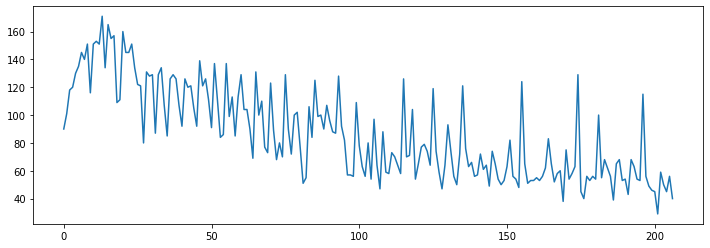

In [63]:
#yのグラフを作って全体間を確認する

train['y'].plot(figsize=(12,4))

In [65]:
#時系列で売り上げが下がっている印象。時系列系の列が無いか確認

train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [67]:
#datetimeから年と月を取り出す

#少し難しいが2013-11-18を’ー’で分け[2013, 11, 18]となるから0番目を取り出せば年になる
train['year'] = train['datetime'].apply(lambda x: x.split('-')[0])

train['month'] = train['datetime'].apply(lambda x: x.split('-')[1])

train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11


In [68]:
#testにも同じことをする

test['year'] = test['datetime'].apply(lambda x: x.split('-')[0])
test['month'] = test['datetime'].apply(lambda x: x.split('-')[1])

In [69]:
#trainのデータ型を確認

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
 12  year           207 non-null    object 
 13  month          207 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.8+ KB


In [70]:
#year month を整数型に変換したい

train['year'] = train['year'].astype(np.int)
train['month'] = train['month'].astype(np.int)

In [71]:
test['year'] = test['year'].astype(np.int)
test['month'] = test['month'].astype(np.int)

In [75]:
trainX = train[['year', 'month']]
testX = test[['year', 'month']]

y = train['y']

trainX.head()

,year,month
0,2013,11
1,2013,11
2,2013,11
3,2013,11
4,2013,11


In [76]:
model = LR()

In [77]:
model.fit(trainX, y)

LinearRegression()

In [78]:
model.coef_

#やはり年が進むとグラフも右肩下がり

array([-104.0107109 ,   -7.41004428])

In [79]:
model.intercept_

209594.15656370917

In [85]:
pred = model.predict(testX)

In [84]:
sample[1] = pred

In [83]:
sample.to_csv('./output_csv/submit4.csv', index=None, header=None)

### 19.26と大幅にスコアが上がった

## 追加する特徴量検討のため、trainXに対する予測値を変数predに代入

In [ ]:
・trainXに予測を行えば実際の売り上げｙが分かっているためその差を比較できる
・予測値と実際の売り上げを引き算し、どの日が大きく外れていたかを確認
・それが分かれば制度を上げられる可能性がある

In [87]:
pred = model.predict(trainX)

In [88]:
train['pred'] = pred

In [89]:
train['res'] = train['y'] - train['pred']

In [91]:
train.sort_values(by='res')

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,pred,res
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,131.674984,-51.674984
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,139.085028,-49.085028
81,2014-3-26,51,水,0,肉団子クリームシチュー,392.0,NaN,NaN,NaN,曇,--,18.7,2014,3,94.354672,-43.354672
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,94.354672,-39.354672
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,139.085028,-38.085028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,2014,5,79.534583,46.465417
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,72.124539,48.875461
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,64.714495,59.285505
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,49.894406,65.105594


### カレー系、金曜日、お楽しみメニューが制度を下げているのではないかと仮説が立つ

In [92]:
#お楽しみメニューであれば１　そうでなければ０

def f(x):
    if x == 'お楽しみメニュー':
        return 1
    else:
        return 0


In [93]:
#新しいカラムfun を作る

#remarksが1つずつ取り出され関数ｆにわたって数字がリターンされる
train['fun'] = train['remarks'].apply(lambda x: f(x))
test['fun'] = test['remarks'].apply(lambda x: f(x))

In [94]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,pred,res,fun
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,139.085028,-49.085028,0
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,139.085028,-38.085028,0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,139.085028,-21.085028,0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,139.085028,-19.085028,0
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,139.085028,-9.085028,0


In [98]:
trainX = train[['year', 'month', 'fun', 'temperature']]
y = train['y']

testX = test[['year', 'month', 'fun', 'temperature']]

In [99]:
model1 = LR()

In [100]:
model1.fit(trainX, y)

LinearRegression()

In [101]:
model1.coef_

array([-76.3765687 ,  -4.20489757,  44.63348171,  -1.25463854])

In [102]:
model1.intercept_

153945.2541175833

In [103]:
pred1 = model1.predict(testX)

In [105]:
sample[1] = pred1
sample.head()

,0,1
0,2014-10-1,55.452079
1,2014-10-2,50.809916
2,2014-10-3,44.787651
3,2014-10-6,53.821048
4,2014-10-7,53.068265


In [106]:
sample.to_csv('./output_csv/submit5.csv', index=None, header=None)

## 評価13.25とかなりスコアを上げることが出来た！